In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Student_Scores.csv")

In [3]:
data.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
print(data.head(5))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#Drop Column "Unnamed: 0"
data.drop(["Unnamed: 0"], axis =1, inplace = True)

## Gender Distribution

[Text(0, 0, '15424'), Text(0, 0, '15217')]

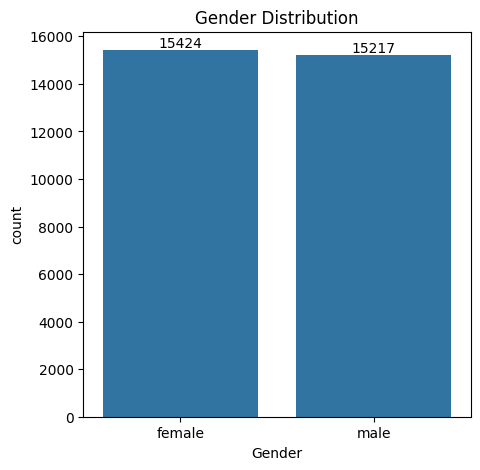

In [9]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x= "Gender", data = data)
plt.title("Gender Distribution")
ax.bar_label(ax.containers[0])

#From the above chart we have analysis that number of female is more then number of mens

## Parent Education & Students Scores

In [10]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [11]:
gb = data.groupby("ParentEduc").agg({'MathScore': 'mean' , 'ReadingScore':'mean' , 'WritingScore':'mean' })

In [12]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


Text(0.5, 1.0, 'Relationship between Parents Education and Student Score')

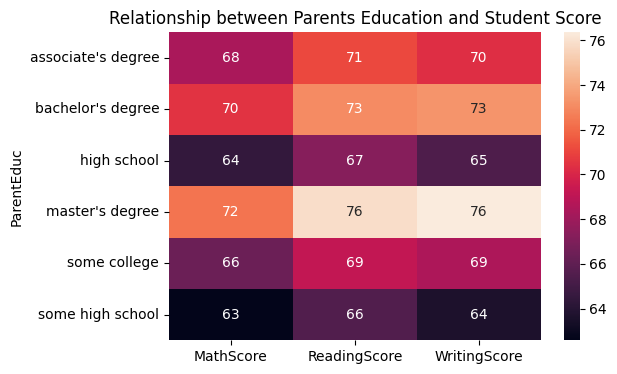

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parents Education and Student Score")

#From the above chart we have concluded that the education of the parents have a good impact on score

## Parent Marital Status & Students Scores

In [14]:
gb1 = data.groupby("ParentMaritalStatus").agg({'MathScore': 'mean' , 'ReadingScore':'mean' , 'WritingScore':'mean' })

In [15]:
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


Text(0.5, 1.0, 'Relationship between Parents Maritial Status and Student Score')

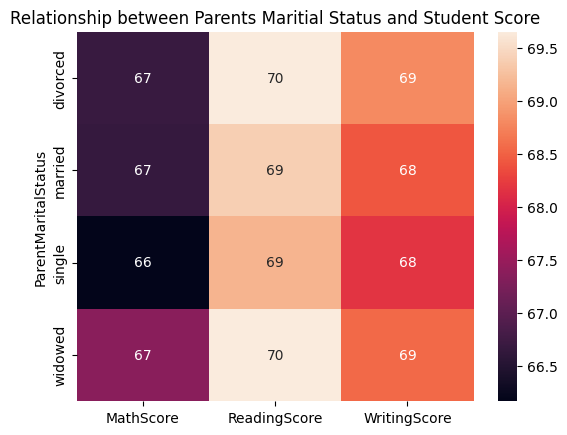

In [16]:
# plt.figure(figsize=(6,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parents Maritial Status and Student Score")

#From the above we have anaylysis that the maritial status of the parents have no impact or negligible impact on the students score

## Practice Sport	

In [17]:
gb2 = data.groupby("PracticeSport").agg({'MathScore': 'mean' , 'ReadingScore':'mean' , 'WritingScore':'mean' })

In [18]:
gb2

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


Text(0.5, 1.0, 'Relationship between Practice Sport Status and Student Score')

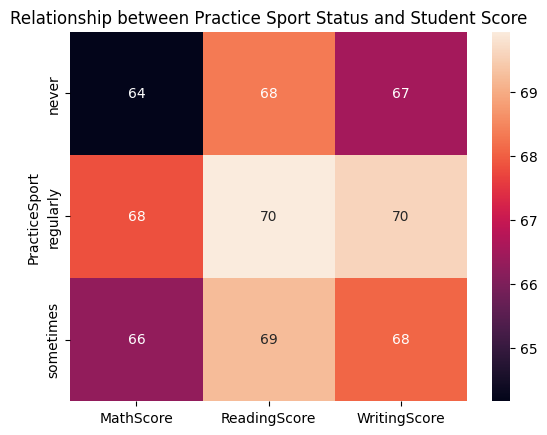

In [19]:
sns.heatmap(gb2, annot = True)
plt.title("Relationship between Practice Sport Status and Student Score")

#From the above chart we get the analysis that students who practice sports regularly have good marks

# Outliers

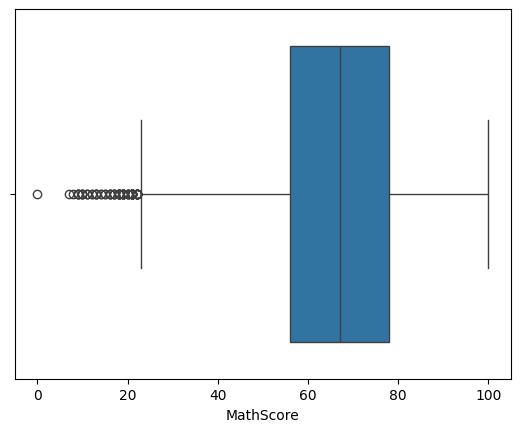

In [20]:
#Ottliers
sns.boxplot(x = "MathScore", data = data)
plt.show()

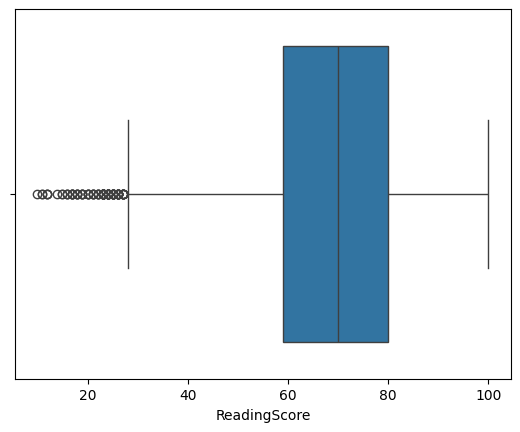

In [21]:
sns.boxplot(x = "ReadingScore", data = data)
plt.show()

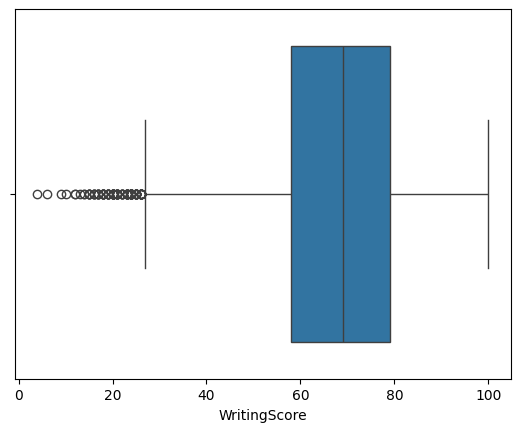

In [22]:
sns.boxplot(x = "WritingScore", data = data)
plt.show()

   # EthnicGroup

In [23]:
data["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# Percentage Distribution of Ethnic Group

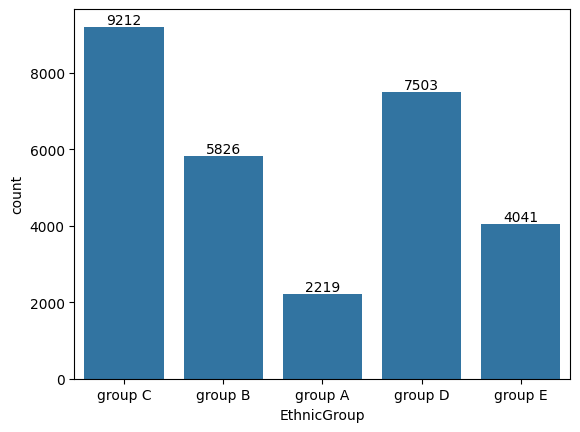

In [24]:
ax = sns.countplot(x = "EthnicGroup", data= data)
ax.bar_label(ax.containers[0])
plt.show()

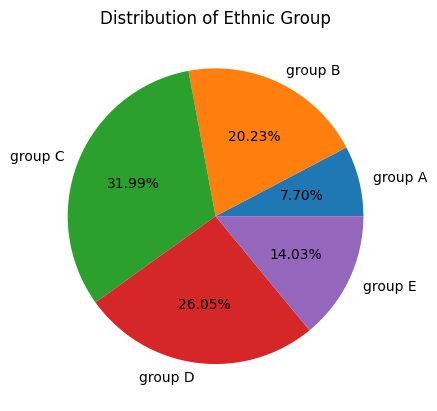

In [25]:
groupA = data.loc[(data["EthnicGroup"]== "group A")].count()
groupB = data.loc[(data["EthnicGroup"]== "group B")].count()
groupC = data.loc[(data["EthnicGroup"]== "group C")].count()
groupD = data.loc[(data["EthnicGroup"]== "group D")].count()
groupE = data.loc[(data["EthnicGroup"]== "group E")].count()

l = ["group A","group B","group C","group D","group E"]

mylist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

plt.pie(mylist, labels=l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()
